In [1]:
import pandas as pd;
import numpy as np;
import json;
import matplotlib.pyplot as plt;
%matplotlib inline

# import sys
# print (sys.argv[1])

In [2]:
rawJSON = json.loads("".join(open('keystrokes-34c38-export (7).json').readlines()))

In [3]:
def calculatePerKeyDwellTime(dataframe,DEBUG=False):
    dwell_times = {}
    for i in set(dataframe.key.unique()):
        if(DEBUG):
            print (i);
        running_average = 0;
        subset = dataframe[dataframe['key'] == i];
        if(len(dataframe[dataframe['key']==i])%2==0):
            for g in range(len(subset)-1):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            if(DEBUG):
                print ("running average: "+str(running_average));
            running_average/=len(subset);
            if(DEBUG):
                print ("running average/subset_len = "+str(running_average));
        else: # last key release not recorded
            for g in range(len(subset)-2):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            running_average/=len(subset);
        dwell_times[i] = running_average;
        if(DEBUG):
            print (" ");
    return dwell_times;    


def calculateFlightTime(dataframe):
#     time between release and next key press
    flight_times = [];
    index_of_releases = ((dataframe[dataframe['action']=='RELEASED']).index.tolist());
    range_of_events = list(range(index_of_releases[0], index_of_releases[-1]));
    index_of_presses = list(set(range_of_events).difference(index_of_releases));
    try:
        first_press = index_of_presses[0];
#         print (index_of_presses)
    except:
        return False;
    while (index_of_presses[0]<index_of_releases[0]):
        del index_of_releases[0];
    while(len(index_of_presses)>0):
        flight_times.append((float(dataframe['timestamp'].iloc[index_of_presses[0]]) - float(dataframe['timestamp'].iloc[index_of_releases[0]])));
        del index_of_releases[0]
        del index_of_presses[0]
    return flight_times;

In [4]:
keystrokes=pd.DataFrame.from_dict(rawJSON)
obj = (keystrokes[:1]['samples'])
keystrokes=pd.DataFrame.from_dict(rawJSON['samples']).T

In [5]:
# Just the new records
lorem_ipsum = keystrokes.iloc[22:]

In [6]:
lorem_ipsum

,keystrokes,subject
-KXcfQLt3sL8sFQLSA25,"[[""1480298596527 Shift PRESSED"",""1480298597351...",An Dee
-KXchppS19K4bkiMZIho,"[[""1480299235028 Shift PRESSED"",""1480299235217...",Joseph Haaga


In [7]:
left_DwellTimes = [];
right_DwellTimes=[];
space_DwellTimes=[];
left_hand_keys = ['q','w','e','r','g','a','s','d','f','g','z','x','c','v'];
# for n in calculatePerKeyDwellTime(split):
#     if(calculatePerKeyDwellTime(split)[n] != 0 ):
#         if n.lower() in left_hand_keys:
#             left_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
#         elif n.lower() == 'spacebar':
#             space_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
#         else:
#             right_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);

In [8]:
# right_DwellTimes
# space_DwellTimes
number_of_chars_per_observation = 20

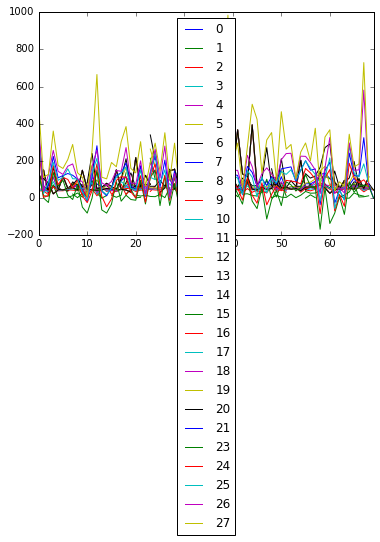

In [9]:
#  .o88o. 8888o. 8888o. 88  88 
#  88  88 88  88 88  88 88  88 
#  888888 88  88 88  88 'Y8888 
#  88  88 88  88 88  88     88 
#  88  88 88  88 8888Y' 8888Y' 

left_hand_keys = ['q','w','e','r','g','a','s','d','f','g','z','x','c','v'];

subject_lorem_keystrokes = json.loads(lorem_ipsum['keystrokes'].iloc[0])[0]
len(subject_lorem_keystrokes)
# There are 1456 keystroke events. We will divide these into groups of 16, giving us 91 records
split_keystrokes = [subject_lorem_keystrokes[x:x+15] for x in range(0, len(subject_lorem_keystrokes),number_of_chars_per_observation)]

descriptive_stats = [];
for n in split_keystrokes:
    left_DwellTimes = [];
    right_DwellTimes=[];
    space_DwellTimes=[];
    split_list=[];
    raw = pd.DataFrame(n);
    for n in raw.index:
        split_list.append(raw[0][n].split(" "));
    split = pd.DataFrame(split_list,columns=['timestamp','key','action']);
    
    for n in calculatePerKeyDwellTime(split):
        if(calculatePerKeyDwellTime(split)[n] != 0 ):
            if n.lower() in left_hand_keys:
                left_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
            elif n.lower() == 'spacebar':
                space_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
            else:
                right_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
#     results = list(pd.Series(list(calculatePerKeyDwellTime(split).values())).describe())[1:];
    results = list(pd.Series(list(left_DwellTimes)).describe())[1:];
#     results+=((list(pd.Series(calculateFlightTime(split)).describe())[1:]))
    results += list(pd.Series(list(right_DwellTimes)).describe())[1:];
    results += list(pd.Series(list(space_DwellTimes)).describe())[1:];
    results += ((list(pd.Series(calculateFlightTime(split)).describe())[1:]))
    descriptive_stats.append(results);
    
andy = pd.DataFrame(descriptive_stats);
andy['subject'] = 'Andy';

andy.plot()

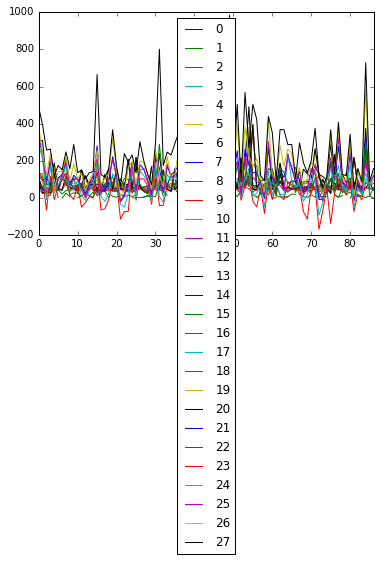

In [10]:
#      88 .o88o. 888888 
#      88 88  88 88     
#      88 88  88 8888   
#  88  88 88  88 88     
#  'Y88Y' 'Y88Y' 888888 

left_hand_keys = ['q','w','e','r','g','a','s','d','f','g','z','x','c','v'];

subject_lorem_keystrokes = json.loads(lorem_ipsum['keystrokes'].iloc[0])[0]
len(subject_lorem_keystrokes)
# There are 1456 keystroke events. We will divide these into groups of 16, giving us 91 records
split_keystrokes = [subject_lorem_keystrokes[x:x+15] for x in range(0, len(subject_lorem_keystrokes),16)]

descriptive_stats = [];
for n in split_keystrokes:
#     print (' ');
    left_DwellTimes = [];
    right_DwellTimes=[];
    space_DwellTimes=[];
    split_list=[];
    raw = pd.DataFrame(n);
    for n in raw.index:
        split_list.append(raw[0][n].split(" "));
    split = pd.DataFrame(split_list,columns=['timestamp','key','action']);
    
    for n in calculatePerKeyDwellTime(split):
        if(calculatePerKeyDwellTime(split)[n] != 0 ):
            if n.lower() in left_hand_keys:
                left_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
            elif n.lower() == 'spacebar':
                space_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
            else:
                right_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
#     results = list(pd.Series(list(calculatePerKeyDwellTime(split).values())).describe())[1:];
    results = list(pd.Series(list(left_DwellTimes)).describe())[1:];
#     print (list(pd.Series(list(left_DwellTimes)).describe())[1:])
#     results+=((list(pd.Series(calculateFlightTime(split)).describe())[1:]))
    results += list(pd.Series(list(right_DwellTimes)).describe())[1:];
#     print ()
#     print (list(pd.Series(list(right_DwellTimes)).describe())[1:])
    results += list(pd.Series(list(space_DwellTimes)).describe())[1:];
#     print ()
#     print (list(pd.Series(list(space_DwellTimes)).describe())[1:])
    results += ((list(pd.Series(calculateFlightTime(split)).describe())[1:]))
#     print ()
#     print ((list(pd.Series(calculateFlightTime(split)).describe())[1:]))
    descriptive_stats.append(results);
#     print (len(descriptive_stats))
    
joe = pd.DataFrame(descriptive_stats);
joe['subject'] = 'Joe';

joe.plot()

In [11]:
sample_descriptive_stats = pd.Series(list(calculatePerKeyDwellTime(split).values())).describe()
sample_descriptive_stats['max']-sample_descriptive_stats['50%']

0.75

In [12]:
# combine Joe & Andy
master = joe.append(andy);
master = master.reset_index();
answers = master['subject'];
X = master.drop('subject',axis=1);
# X

In [13]:
ft_labels = ["flightTime "+n for n in list(pd.Series([1,2,3,4]).describe()[1:].keys())]
dt_labels = ["dwellTime "+n for n in list(pd.Series([1,2,3,4]).describe()[1:].keys())]


In [14]:
labels = dt_labels + ft_labels

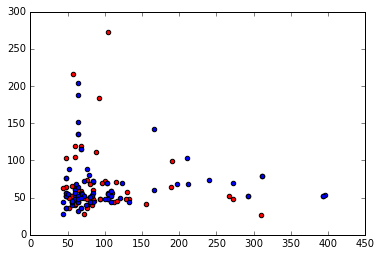

In [15]:
feature1 = 13

feature2 = 4
plt.scatter(joe[feature1], joe[feature2], c='red')
plt.scatter(andy[feature1], andy[feature2],c='blue')

In [16]:
joe = joe.fillna(value=0)
andy = andy.fillna(value=0)

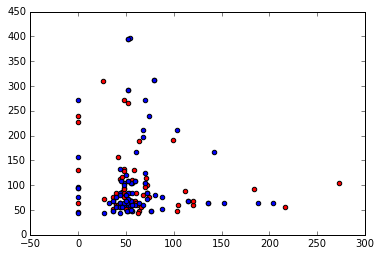

In [65]:
p1=4
p2=13

plt.scatter(joe[p1], joe[p2], c='red')
plt.scatter(andy[p1], andy[p2],c='blue')

In [18]:
master = joe.append(andy);
master = master.reset_index();
answers = master['subject'];
X = master.drop('subject',axis=1);

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, answers, test_size=0.33, random_state=42)

In [20]:
master.iloc[47]

index           47
0          59.6667
1          28.2857
2             39.5
3             43.5
4             47.5
5            69.75
6               92
7          62.8333
8          19.1855
9               48
10              52
11              56
12           70.25
13            84.5
14         45.3333
15               0
16         45.3333
17         45.3333
18         45.3333
19         45.3333
20         45.3333
21           102.6
22         55.5905
23               8
24             105
25             119
26             129
27             152
subject        Joe
Name: 47, dtype: object

In [21]:
X_train.describe()

,index,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,23,24,25,26,27
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,37.742857,61.449021,18.292083,47.634921,53.426389,59.247222,68.321151,77.564127,74.792341,25.337967,...,67.724603,67.724603,67.724603,67.724603,121.751338,29.752381,74.416667,116.276190,162.573810,231.428571
std,24.042442,41.603307,40.086703,29.994578,33.034233,40.732037,52.477390,67.064789,51.484031,33.238148,...,51.146528,51.146528,51.146528,51.146528,87.936317,67.250219,73.023258,87.967241,124.358802,153.263402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-17.000000,-167.000000,-92.000000,-19.500000,0.000000,0.000000
25%,17.000000,44.000000,0.000000,36.000000,41.000000,44.000000,44.000000,44.000000,50.500000,4.949747,...,42.500000,42.500000,42.500000,42.500000,57.333333,-16.000000,14.000000,52.000000,88.000000,128.000000
50%,36.000000,52.000000,5.656854,44.000000,48.750000,52.000000,55.375000,56.000000,61.000000,12.864680,...,52.500000,52.500000,52.500000,52.500000,115.000000,41.000000,77.000000,108.000000,140.000000,177.000000
75%,58.000000,70.000000,16.970563,55.500000,62.000000,68.000000,74.666667,87.500000,79.750000,27.858272,...,104.000000,104.000000,104.000000,104.000000,157.666667,80.000000,113.500000,158.000000,212.500000,304.000000
max,86.000000,272.250000,311.480537,204.000000,204.000000,272.250000,382.375000,492.500000,396.500000,132.137239,...,218.000000,218.000000,218.000000,218.000000,515.200000,152.000000,289.500000,496.000000,928.000000,984.000000


In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
list(clf.feature_importances_)

[0.18602931477610199,
 0.079202409777302599,
 0.089705053541236146,
 0.0,
 0.090302802589107292,
 0.0,
 0.0,
 0.0,
 0.047341724591395837,
 0.062636697751908402,
 0.014089798985534481,
 0.0,
 0.0065752395265827532,
 0.0,
 0.057640086759004679,
 0.062454782737298251,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0098628592898741332,
 0.066110258182645196,
 0.18202229480592896,
 0.0,
 0.0,
 0.019725718579748266,
 0.0,
 0.0,
 0.02630095810633102]

In [23]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 4), random_state=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.53846153846153844

In [43]:
from sklearn.svm import SVC
clf1 = SVC(C=1.0, verbose=True, probability=False, decision_function_shape='ovr', kernel='sigmoid')
clf1.fit(X_train, y_train) 
# clf1.predict_proba(X_test)
clf1.score(X_test,y_test)

[LibSVM]

0.53846153846153844

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
clf.score(X_test,y_test)

/Users/joseph/anaconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.5

In [26]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
GaussianNB(priors=None)
clf.score(X_test,y_test)

# clf.get_params()

0.55769230769230771

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, )
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.28846153846153844

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
# clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.8, max_depth=5, random_state=0).fit(X_train, y_train)
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.8, max_depth=5, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test) 

0.34615384615384615

In [29]:
# separate Dwell Time & Flight Time metrics for left hand and right hand
left_hand_keys = ['q','w','e','r','g','a','s','d','f','g','z','x','c','v']

In [30]:
labels = ['index'] + labels + ['subject']

In [31]:
labels

['index',
 'dwellTime mean',
 'dwellTime std',
 'dwellTime min',
 'dwellTime 25%',
 'dwellTime 50%',
 'dwellTime 75%',
 'dwellTime max',
 'flightTime mean',
 'flightTime std',
 'flightTime min',
 'flightTime 25%',
 'flightTime 50%',
 'flightTime 75%',
 'flightTime max',
 'subject']

In [32]:
for n in master:
#     print (n+" "+master[n].value_counts())
    print (str(n)+": "+str(len(master[n].value_counts())))

index: 87
0: 91
1: 74
2: 43
3: 85
4: 70
5: 89
6: 54
7: 122
8: 116
9: 49
10: 95
11: 77
12: 103
13: 68
14: 67
15: 1
16: 67
17: 67
18: 67
19: 67
20: 67
21: 136
22: 139
23: 63
24: 115
25: 100
26: 117
27: 80
subject: 2


In [33]:
len(master)

157

In [34]:
master['dwellTime 50%'].value_counts()

KeyError: 'dwellTime 50%'